In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np

In [116]:
better = pd.read_csv("/Users/karolina/Git/time_series/TimeSeriesAnalysis/fuel_price/results/arimaxEvaluationBetter.csv")
worse = pd.read_csv("/Users/karolina/Git/time_series/TimeSeriesAnalysis/fuel_price/results/arimaxEvaluationWorse.csv")
statistics = pd.read_csv("/Users/karolina/Git/time_series/TimeSeriesAnalysis/arimaXStatistics.csv")

SHAPIRO_VALUE = "ShapiroValue"
LJUNG_VALUE = "ljungValue"
STORE_ID = "storeId"
DEPARTMENT_ID = "departmentId"

In [117]:
better_counts = better[DEPARTMENT_ID].value_counts().sort_index()
worse_counts = worse[DEPARTMENT_ID].value_counts().sort_index()
total_counts = statistics[DEPARTMENT_ID].value_counts().sort_index()

<Figure size 1500x800 with 0 Axes>

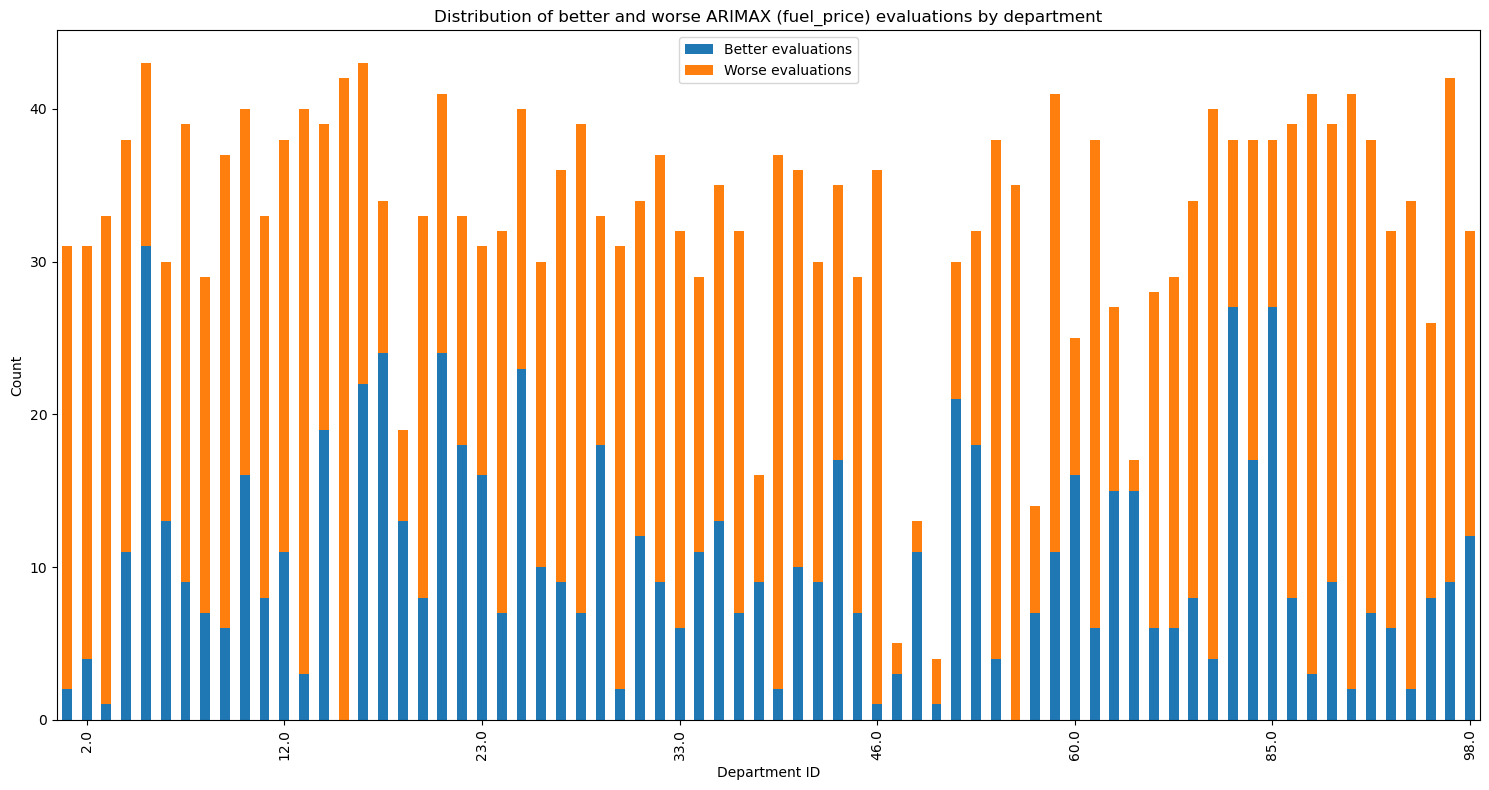

In [118]:
comparison_df = pd.DataFrame({
    'Better evaluations': better_counts,
    'Worse evaluations': worse_counts,
    'Total evaluations': total_counts
}).fillna(0)

comparison_df['Percentage better'] = (comparison_df['Better evaluations'] / comparison_df['Total evaluations']) * 100
comparison_df['Percentage worse'] = (comparison_df['Worse evaluations'] / comparison_df['Total evaluations']) * 100

plt.figure(figsize=(15,8))
comparison_df[['Better evaluations', 'Worse evaluations']].plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('Department ID')
plt.ylabel('Count')
plt.title('Distribution of better and worse ARIMAX (fuel_price) evaluations by department')
plt.xticks(rotation=90)
plt.xticks(np.arange(1, 80, 10))
plt.tight_layout()
plt.show()

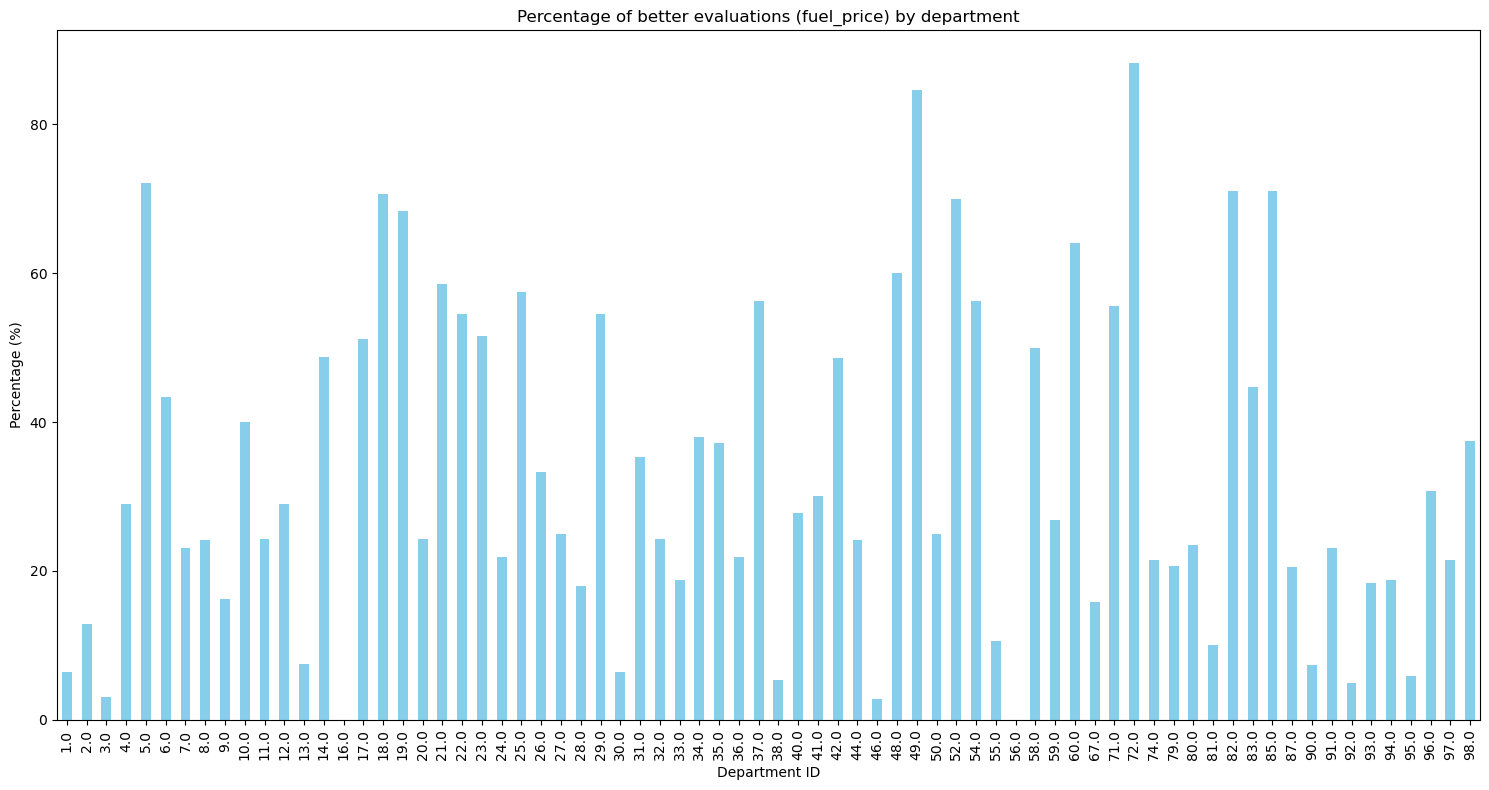

In [119]:
plt.figure(figsize=(15, 8))
comparison_df['Percentage better'].plot(kind='bar', color='skyblue', figsize=(15, 8))
plt.xlabel('Department ID')
plt.ylabel('Percentage (%)')
plt.title('Percentage of better evaluations (fuel_price) by department')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [120]:
interestingDepartments = comparison_df[comparison_df['Percentage better'] > 60].reset_index()

In [121]:
len(interestingDepartments)

9

In [122]:
print(interestingDepartments)

   departmentId  Better evaluations  Worse evaluations  Total evaluations  \
0           5.0                31.0                 12                 43   
1          18.0                24.0                 10                 34   
2          19.0                13.0                  6                 19   
3          49.0                11.0                  2                 13   
4          52.0                21.0                  9                 30   
5          60.0                16.0                  9                 25   
6          72.0                15.0                  2                 17   
7          82.0                27.0                 11                 38   
8          85.0                27.0                 11                 38   

   Percentage better  Percentage worse  
0          72.093023         27.906977  
1          70.588235         29.411765  
2          68.421053         31.578947  
3          84.615385         15.384615  
4          70.000000    

In [123]:
countsBetter = better[DEPARTMENT_ID].isin(interestingDepartments[DEPARTMENT_ID])

In [124]:
countsBetter.sum()

185

In [125]:
coutsWorse = worse[DEPARTMENT_ID].isin(interestingDepartments)

In [126]:
coutsWorse.sum()

0